In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import auc

In [2]:
df = pd.read_csv('/Users/noahpovis/Desktop/Buildweek22/Build Week 2 /DX.csv')



In [3]:
def clean(i):
    i = i.copy()
    i.drop_duplicates(subset=['Organization Name','Funding Type'], inplace = True)
    i.drop_duplicates(keep='first', inplace= True)
    i['Raised Series A'] = np.where(i['Organization Name'].duplicated(), 1, 0)
    i.drop_duplicates(subset='Organization Name', keep='last', inplace= True)
    i['Money Raised Currency (in USD)'] = pd.to_numeric(i['Money Raised Currency (in USD)'], errors='coerce')
    i['Total Funding Amount Currency (in USD)'] = pd.to_numeric(i['Total Funding Amount Currency (in USD)'], errors='coerce')
    i['Announced Date'] = pd.to_datetime(i['Announced Date'], errors='coerce')
    i['Total Funding Amount Currency (in USD)'] = pd.to_numeric(i['Total Funding Amount Currency (in USD)'], errors='coerce')
    i  = i[i['Funding Type'] != 'Series A'] 
    return i 

In [4]:
df_clean = clean(df)

In [5]:
def split_columns(text):
    text = text.copy()
    # new data frame with split value columns 
    new = text["Organization Industries"].str.split(",", n = 7, expand = True) 
    # making separate first name column from new data frame 
    text["Primary Industry"]= new[0] 
    # making separate last name column from new data frame 
    text["Sub_Ind"]= new[1] 
    text["Sub_Ind2"]= new[2]
    text["Sub_Ind3"]= new[3]
    text["Sub_Ind4"]= new[4]
    text["Sub_Ind5"]= new[5]
    text["Sub_Ind6"]= new[6]
    text["Sub_Ind7"]= new[7]
    # Dropping old Name columns 
    text.drop(columns =["Organization Industries"], inplace = True)

    #same thing but for investor column 
    new1 = text["Investor Names"].str.split(",", n = 11, expand = True) 
    # making separate first name column from new data frame 
    text["Investor1"]= new1[0] 
    # making separate last name column from new data frame 
    text["Investor1"]= new1[1] 
    text["Investor2"]= new1[2]
    text["Investor3"]= new1[3]
    text["Investor4"]= new1[4]
    text["Investor5"]= new1[5]
    text["Investor6"]= new1[6]
    text["Investor7"]= new1[7]
    text["Investor8"]= new1[8]
    text["Investor9"]= new1[9]
    text["Investor10"]= new1[10]
    text["Investor11"]= new1[11]
    # Dropping old Name columns 
    text.drop(columns =["Investor Names"], inplace = True)
    text.drop(columns =["Lead Investors"], inplace = True)
    text.drop(columns =["Number of Investors"], inplace = True)
    text.drop(columns =["Transaction Name"], inplace = True)
    text.drop(columns =["Transaction Name URL"], inplace = True)
    text.drop(columns =["Organization Name URL"], inplace = True)
    text.drop(columns =["Funding Type"], inplace = True)
    text.drop(columns =["Money Raised Currency"], inplace = True)
    text.drop(columns =["Total Funding Amount Currency"], inplace = True)
    text.drop(columns =["Total Funding Amount"], inplace = True)
    text.drop(columns =["Money Raised"], inplace = True)
    text.drop(columns =["Total Funding Amount Currency (in USD)"], inplace = True)
    text.drop(columns =['Announced Date'], inplace = True) 
    text = text[text['Money Raised Currency (in USD)'].notna()]
    text = text[text['Organization Location'].notna()]
    text = text[text['Primary Industry'].notna()]
    text = text[text['Money Raised Currency (in USD)'].notna()]

    



    return text 
    


In [6]:
df_split = split_columns(df_clean)

In [7]:
def clean_null(a):
    a['Primary Industry'].fillna('Not Listed', inplace = True)
    a['Sub_Ind'].fillna('Not Listed', inplace = True)
    a['Sub_Ind2'].fillna('Not Listed', inplace = True)
    a['Sub_Ind3'].fillna('Not Listed', inplace = True)
    a['Sub_Ind4'].fillna('Not Listed', inplace = True)
    a['Sub_Ind5'].fillna('Not Listed', inplace = True)
    a['Sub_Ind6'].fillna('Not Listed', inplace = True)
    a['Sub_Ind7'].fillna('Not Listed', inplace = True)
    a['Investor1'].fillna('Not Listed', inplace = True)
    a['Investor2'].fillna('Not Listed', inplace = True)
    a['Investor3'].fillna('Not Listed', inplace = True)
    a['Investor4'].fillna('Not Listed', inplace = True)
    a['Investor5'].fillna('Not Listed', inplace = True)
    a['Investor6'].fillna('Not Listed', inplace = True)
    a['Investor7'].fillna('Not Listed', inplace = True)
    a['Investor8'].fillna('Not Listed', inplace = True)
    a['Investor9'].fillna('Not Listed', inplace = True)
    a['Investor10'].fillna('Not Listed', inplace = True)
    a['Investor11'].fillna('Not Listed', inplace = True)
    
    return a 





In [8]:
data = clean_null(df_split)
data.sample(5)

,Organization Name,Money Raised Currency (in USD),Organization Description,Organization Location,Raised Series A,Primary Industry,Sub_Ind,Sub_Ind2,Sub_Ind3,Sub_Ind4,...,Investor2,Investor3,Investor4,Investor5,Investor6,Investor7,Investor8,Investor9,Investor10,Investor11
6465,Ruixiude,2239140.0,Ruixiude is a commercial vehicle service platf...,"Guangzhou, Guangdong, China, Asia",0,Automotive,Information Technology,Software,Not Listed,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
4899,Quintillion,67000.0,Quintillion is a smart and inspiring digital s...,"Colchester, Essex, United Kingdom, Europe",0,Health Care,Information Services,Information Technology,Wellness,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
25983,Gigantic Media,50000.0,Gigantic Media is a technology platform in the...,"Bedford, Massachusetts, United States, North A...",0,Advertising,Outdoor Advertising,Not Listed,Not Listed,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
13088,Wuxi Jincheng Curtain Wall,200000.0,Wuxi Jincheng Curtain provide systematic solut...,"Wuxi, Anhui, China, Asia",0,Civil Engineering,Construction,Not Listed,Not Listed,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
8448,Fooddocs,299989.0,FoodDocs is a food safety desk for a food busi...,"Tallinn, Harjumaa, Estonia, Europe",0,Agriculture,Food and Beverage,Hospitality,Not Listed,Not Listed,...,Timo Rein,United Angels VC,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed


In [9]:
data.isnull().sum()

Organization Name                 0
Money Raised Currency (in USD)    0
Organization Description          0
Organization Location             0
Raised Series A                   0
Primary Industry                  0
Sub_Ind                           0
Sub_Ind2                          0
Sub_Ind3                          0
Sub_Ind4                          0
Sub_Ind5                          0
Sub_Ind6                          0
Sub_Ind7                          0
Investor1                         0
Investor2                         0
Investor3                         0
Investor4                         0
Investor5                         0
Investor6                         0
Investor7                         0
Investor8                         0
Investor9                         0
Investor10                        0
Investor11                        0
dtype: int64

In [10]:
#convert all to categories 
data["Organization Name"] = data["Organization Name"].astype('category')
data["Organization Description"] = data["Organization Description"].astype('category')
data["Organization Description"] = data["Organization Description"].astype('category')
data["Organization Location"] = data["Organization Location"].astype('category')
data["Primary Industry"] = data["Primary Industry"].astype('category')
data["Sub_Ind"] = data["Sub_Ind"].astype('category')
data["Sub_Ind2"] = data["Sub_Ind2"].astype('category')
data["Sub_Ind3"] = data["Sub_Ind3"].astype('category')
data["Sub_Ind4"] = data["Sub_Ind4"].astype('category')
data["Sub_Ind5"] = data["Sub_Ind5"].astype('category')
data["Sub_Ind6"] = data["Sub_Ind6"].astype('category')
data["Sub_Ind7"] = data["Sub_Ind7"].astype('category')
data["Investor1"] = data["Investor1"].astype('category')
data["Investor2"] = data["Investor2"].astype('category')
data["Investor3"] = data["Investor3"].astype('category')
data["Investor4"] = data["Investor4"].astype('category')
data["Investor5"] = data["Investor5"].astype('category')
data["Investor6"] = data["Investor6"].astype('category')
data["Investor7"] = data["Investor7"].astype('category')
data["Investor8"] = data["Investor8"].astype('category')
data["Investor9"] = data["Investor9"].astype('category')
data["Investor10"] = data["Investor10"].astype('category')
data["Investor11"] = data["Investor11"].astype('category')

In [11]:
data.dtypes

Organization Name                 category
Money Raised Currency (in USD)     float64
Organization Description          category
Organization Location             category
Raised Series A                      int64
Primary Industry                  category
Sub_Ind                           category
Sub_Ind2                          category
Sub_Ind3                          category
Sub_Ind4                          category
Sub_Ind5                          category
Sub_Ind6                          category
Sub_Ind7                          category
Investor1                         category
Investor2                         category
Investor3                         category
Investor4                         category
Investor5                         category
Investor6                         category
Investor7                         category
Investor8                         category
Investor9                         category
Investor10                        category
Investor11 

In [12]:
data.describe()

,Money Raised Currency (in USD),Raised Series A
count,1.262300e+04,12623.000000
mean,1.597823e+06,0.057514
std,3.862080e+06,0.232831
min,2.770000e+02,0.000000
25%,2.250000e+05,0.000000
50%,7.750000e+05,0.000000
75%,2.000000e+06,0.000000
max,2.944858e+08,1.000000


In [13]:
raised = data[data['Raised Series A'] == 1] 

In [14]:
raised.sample(5)

,Organization Name,Money Raised Currency (in USD),Organization Description,Organization Location,Raised Series A,Primary Industry,Sub_Ind,Sub_Ind2,Sub_Ind3,Sub_Ind4,...,Investor2,Investor3,Investor4,Investor5,Investor6,Investor7,Investor8,Investor9,Investor10,Investor11
11871,VERKOOP,47000.0,"Mobile App, E-commerce, Marketplace","New York, New York, United States, North America",1,E-Commerce,Internet,Marketplace,Mobile Apps,Software,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
9691,Nowi,1145744.0,Nowi is developing a Power Module (energy harv...,"Delft, Zuid-Holland, The Netherlands, Europe",1,Consumer Electronics,Energy,Energy Management,Internet of Things,Semiconductor,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
13696,Seez,1000000.0,Seez is a data-first automotive platform that ...,"Dubai, Dubai, United Arab Emirates, Asia",1,Apps,Artificial Intelligence,E-Commerce,Image Recognition,Internet,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
17562,Move This World,1000000.0,Daily practice of identifying expressing and m...,"New York, New York, United States, North America",1,E-Learning,EdTech,Education,Wellness,Not Listed,...,Prairie Capital,The Global Good Fund,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
19243,Neighbor,2700000.0,Neighbor specializes in the fields of public s...,"Lehi, Utah, United States, North America",1,Information Technology,Internet,Logistics,Marketplace,Peer to Peer,...,Revolution,Revolution’s Rise of the Rest Seed Fund,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed


In [15]:
#the baseline 
data['Raised Series A'].value_counts(normalize=True)

0    0.942486
1    0.057514
Name: Raised Series A, dtype: float64

In [16]:
#also baseline
((0.942486*0.942486)+(0.057514*0.057514))*100

89.15877203920002

In [17]:
x = data.drop(columns=['Raised Series A'])
y = data['Raised Series A']

In [18]:
#CatBoosting 
from sklearn.model_selection import train_test_split
X_trainc, X_testc, y_trainc, y_testc = train_test_split(x, y, train_size=0.7, random_state=1234)

In [19]:
#categorical features 
categorical_features_indices = np.where(x.dtypes != np.float)[0]
#importing library and building model
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=50, depth=3, learning_rate=0.1)
model.fit(X_trainc, y_trainc,cat_features=categorical_features_indices,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5781357	total: 208ms	remaining: 10.2s
1:	learn: 0.4905975	total: 245ms	remaining: 5.88s
2:	learn: 0.4252704	total: 251ms	remaining: 3.92s
3:	learn: 0.3668758	total: 258ms	remaining: 2.97s
4:	learn: 0.3310237	total: 267ms	remaining: 2.4s
5:	learn: 0.2985655	total: 277ms	remaining: 2.03s
6:	learn: 0.2741553	total: 289ms	remaining: 1.78s
7:	learn: 0.2597342	total: 299ms	remaining: 1.57s
8:	learn: 0.2485459	total: 306ms	remaining: 1.39s
9:	learn: 0.2380100	total: 313ms	remaining: 1.25s
10:	learn: 0.2315613	total: 319ms	remaining: 1.13s
11:	learn: 0.2254359	total: 334ms	remaining: 1.06s
12:	learn: 0.2209957	total: 341ms	remaining: 970ms
13:	learn: 0.2162532	total: 350ms	remaining: 899ms
14:	learn: 0.2134406	total: 357ms	remaining: 834ms
15:	learn: 0.2107301	total: 366ms	remaining: 777ms
16:	learn: 0.2091387	total: 382ms	remaining: 741ms
17:	learn: 0.2059771	total: 389ms	remaining: 692ms
18:	learn: 0.2044907	total: 396ms	remaining: 646ms
19:	learn: 0.2031667	total: 403ms	remainin

In [20]:
#cat test predictions 
catpredictions_test = model.predict(X_testc)
print(classification_report(y_testc, catpredictions_test))

precision    recall  f1-score   support

           0       0.94      1.00      0.97      3560
           1       0.00      0.00      0.00       227

    accuracy                           0.94      3787
   macro avg       0.47      0.50      0.48      3787
weighted avg       0.88      0.94      0.91      3787



In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [62]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((10098, 23), (2525, 23), (10098,), (2525,))

In [63]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier())

params = {
        'xgbclassifier__min_child_weight': [1, 5, 10],
        'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
        'xgbclassifier__subsample': [0.6, 0.8, 1.0],
        'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
        'xgbclassifier__max_depth': [3, 4, 5],
        'xgbclassifier__scale_pos_weight': [10,100,1000,10000,100000],
        "xgbclassifier__reg_alpha": [0, 0.5, 1],
        "xgbclassifier__reg_lambda": [1, 1.5, 2, 3, 4.5],
        "xgbclassifier__n_estimators": [100, 250, 500, 1000]
        }

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=params, 
    n_iter=10, 
    cv=5,  
    verbose=10, 
    return_train_score=True,
    scoring=None,  
    n_jobs=-1
)


pipe = search.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished


In [64]:
print('Best hyperparameters', pipe.best_params_)
print('Cross-validation score', pipe.best_score_)

Best hyperparameters {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 1000, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__reg_alpha': 1, 'xgbclassifier__n_estimators': 1000, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 4, 'xgbclassifier__gamma': 1.5, 'xgbclassifier__colsample_bytree': 0.6}
Cross-validation score 0.9407802607898235


In [65]:
#gridcv xgb 
predictions_test = pipe.predict(X_test)
print(classification_report(y_test, predictions_test))

precision    recall  f1-score   support

           0       0.94      1.00      0.97      2372
           1       0.00      0.00      0.00       153

    accuracy                           0.94      2525
   macro avg       0.47      0.50      0.48      2525
weighted avg       0.88      0.94      0.91      2525



In [66]:
probs = pipe.predict_proba(X_test)
probs = probs[:, 1]

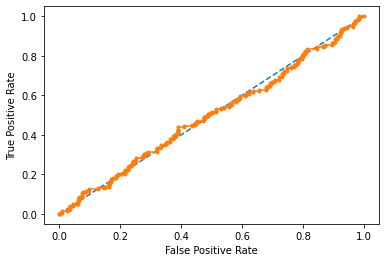

AUC: 0.498


In [67]:
#ROC Curve 
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()
auc_score = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_score)

In [68]:
precision, recall, thresholds = precision_recall_curve(y_test, probs)
auc_score = auc(recall, precision)

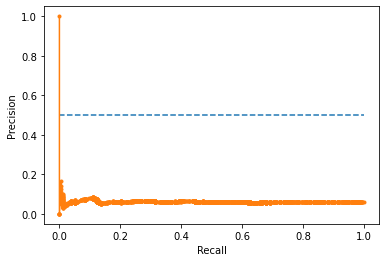

AUC: 0.061


In [69]:
#Precision-Recall Curve Line Plot for XGB GRIDCV for Imbalanced Classification
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.show()
print('AUC: %.3f' % auc_score)

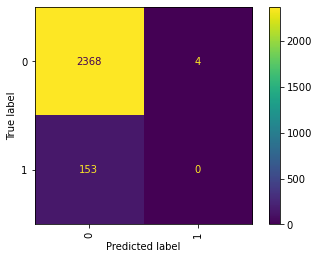

In [70]:
#XGB GRIDCV
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test, values_format='.0f', xticks_rotation='vertical')

In [71]:
document_lengths = np.array(list(map(len, data['Organization Description'].str.split(' '))))

print("The average number of words in a description is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a description is: {}.".format(min(document_lengths)))
print("The maximum number of words in a description is: {}.".format(max(document_lengths)))

The average number of words in a description is: 13.168660381842669.
The minimum number of words in a description is: 1.
The maximum number of words in a description is: 28.


In [72]:
pd.set_option('display.max_colwidth', -1)

In [73]:
query = data.loc[data['Raised Series A'] == 0, 'Organization Description']
query.sample(5)

18628    VR+biometrics AI-based assessments, behavioral & emotional neurotrainings for corporates - Future of jobs              
8593     Liine is a mobile application platform that specializes in voice analytics, performance management, and call analytics.
12460    Lines Up is provides the principle platforms for opinion, commentary and debate on utility regulation and policy.      
26178    A SaaS software using AI to synchronize your Supply Chain planning with your suppliers and customers.                  
24752    Automating machine diagnostics for manufacturing                                                                       
Name: Organization Description, dtype: category
Categories (12621, object): [A developing a comprehensive verification framework for Intelligent Autonomous Systems ., A fashion enterprise that provides a launchpad to fashion talent and brands using a tech enabled platform, A precise and portable in-vitro device that brings efficiency to the hematologica

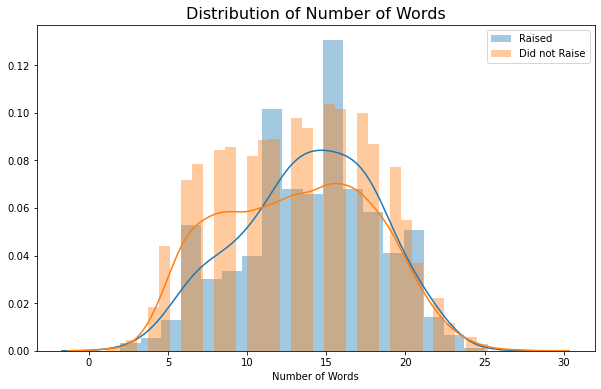

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(document_lengths[data['Raised Series A'] == 1], ax=ax, label='Raised')
sns.distplot(document_lengths[data['Raised Series A'] == 0], ax=ax, label='Did not Raise')

ax.set_title("Distribution of Number of Words", fontsize=16)
ax.set_xlabel("Number of Words")
plt.legend()
plt.show()

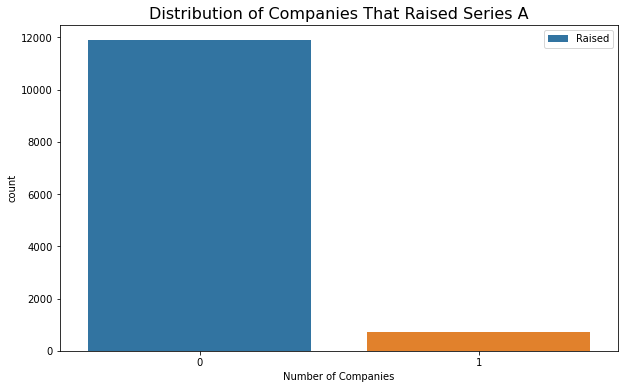

In [75]:
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(x='Raised Series A', data=data,ax=ax, label='Raised')
ax.set_title("Distribution of Companies That Raised Series A", fontsize=16)
ax.set_xlabel("Number of Companies")
plt.legend()
plt.show()

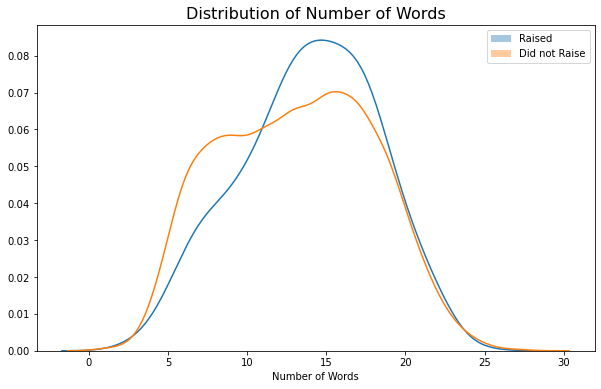

In [76]:
LogMin, LogMax = np.log10(data['Raised Series A'].min()),np.log10(data['Raised Series A'].max())
newBins = np.logspace(LogMin, LogMax,8)


fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(document_lengths[data['Raised Series A'] == 1], ax=ax,bins=newBins,label='Raised')
sns.distplot(document_lengths[data['Raised Series A'] == 0], ax=ax,bins=newBins, label='Did not Raise')

ax.set_title("Distribution of Number of Words", fontsize=16)
ax.set_xlabel("Number of Words")
plt.legend()
plt.show()

In [77]:
# Function to preprocess raw test from job description
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    text = text.split()    
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lem_words)
    return text

# Remove extra white space
data['Organization Description'] = data['Organization Description'].apply(lambda x: ' '.join(x.split()))

# Remove punctuation and numbers
data['Organization Description'] = data['Organization Description'].str.replace('[^\w\s]', ' ').str.replace('\d+', '')

# Convert to lower case
data['Organization Description'] = data['Organization Description'].str.lower()

# Lemmatize
data['Organization Description'] = data['Organization Description'].map(lambda x: lemmatize(x))

In [78]:
#build a document term matrix for use in building our LDA topic model 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['is','and','to','the','for','that','of','in','an','with','is an','on','by','their','your'])
tf_vectorizer = CountVectorizer(ngram_range = (1,2),
                                stop_words = stop_words,
                                max_df = 0.8, 
                                min_df = 2)

dtm_tf = tf_vectorizer.fit_transform(data['Organization Description'])
dtm_feature_names = tf_vectorizer.get_feature_names()

print('Document Term Matrix Shape: {}'.format(dtm_tf.shape))

Document Term Matrix Shape: (12623, 14579)


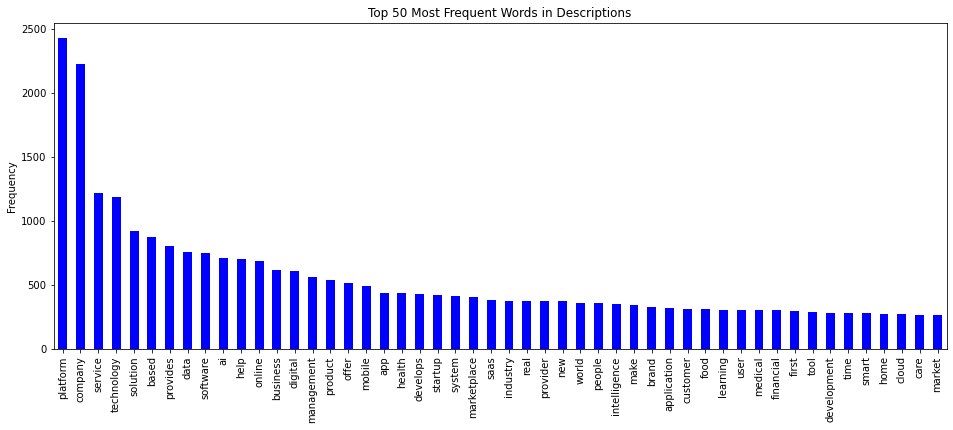

In [79]:
plt.figure(figsize=(16,6))
term_df = pd.DataFrame(dtm_tf.toarray(), columns=dtm_feature_names)
term_df.sum(axis=0).sort_values(ascending=False)[0:50].plot.bar(color='blue')
plt.title("Top 50 Most Frequent Words in Descriptions")
plt.ylabel("Frequency")
plt.show()

In [80]:
#build the topic model 
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda_tf = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(random_state=10)

In [81]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [82]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# Visualize the topics
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.025396 -0.140982  1       1        13.887478
7     -0.121966 -0.143456  2       1        11.164963
4     -0.074830  0.031323  3       1        11.130023
9     -0.051898  0.005779  4       1        10.042253
0      0.174643  0.022644  5       1        9.782093 
1      0.148898  0.043079  6       1        9.658377 
5      0.024095 -0.013572  7       1        9.267483 
3     -0.027982 -0.020652  8       1        9.176674 
2     -0.162291  0.158281  9       1        8.576756 
8      0.065935  0.057557  10      1        7.313899 , topic_info=             Term         Freq        Total Category  logprob  loglift
2500   company     2018.000000  2018.000000  Default  30.0000  30.0000
8421   mobile      442.000000   442.000000   Default  29.0000  29.0000
7463   learning    280.000000   280.000000   Default  28.0000  28.0000
6043   health      397.000000   397.000000   Default  27.0000  27.0000
286    ai          647.000000   647.000000   Default  26.0000  26.0000
...    ..                 ...          ...       ...      ...      ...
7906   management  35.810288    510.639105   Topic10 -5.6693  -0.0420 
3859   device      30.449936    214.652418   Topic10 -5.8315   0.6625 
12327  solution    34.267690    836.654883   Topic10 -5.7133  -0.5798 
1033   based       32.405334    797.974533   Topic10 -5.7692  -0.5884 
6160   help        30.424977    642.631322   Topic10 -5.8323  -0.4349 

[715 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
27     1      0.138748  access       
27     3      0.073025  access       
27     4      0.058420  access       
27     5      0.051118  access       
27     6      0.080328  access       
...   ..           ...     ...       
14504  6      0.163687  world        
14504  7      0.033344  world        
14504  8      0.118219  world        
14504  10     0.015156  world        
14520  5      0.928220  world largest

[1857 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 5, 10, 1, 2, 6, 4, 3, 9])

In [83]:

# xgbclassifer + topic modeling 
# Extract Topic Distributions from LDA model for each pitcher
col_names = ["Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_tf.transform(dtm_tf)
topic_df = pd.DataFrame(topic_dist, columns = col_names)
topic_df.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)
# Join topic dataframe with numerical features from Method #1
df2 = pd.concat([data, topic_df], axis=1)
print(f'Original Dataframe Shape: {data.shape}')
print(f'New Dataframe Shape: {df2.shape}\n')
df2.head()

Original Dataframe Shape: (12623, 24)
New Dataframe Shape: (12623, 34)



,Organization Name,Money Raised Currency (in USD),Organization Description,Organization Location,Raised Series A,Primary Industry,Sub_Ind,Sub_Ind2,Sub_Ind3,Sub_Ind4,...,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,Xperiti,1200000.0,xperiti is an ai powered enterprise software designed to give investment management firm a strategic advantage in research,"New York, New York, United States, North America",0,Artificial Intelligence,Consulting,Content,Information Services,Information Technology,...,0.005556,0.005556,0.005557,0.005557,0.005556,0.005558,0.486122,0.005557,0.005556,0.469424
1,New Age Meats,2740000.0,new age meat focus on rapid development of healthy culitvated meat grown from animal cell instead of animal slaughter,"Berkeley, California, United States, North America",0,Biotechnology,Food and Beverage,Not Listed,Not Listed,Not Listed,...,0.006251,0.006251,0.006252,0.006252,0.006252,0.006251,0.006251,0.006252,0.663315,0.286673
2,Clever Care Health Plan,6000000.0,clever care health plan is a healthcare company that offer medicare advantage health plan to it member,"Westminster, California, United States, North America",1,Health Care,Health Insurance,Insurance,Not Listed,Not Listed,...,0.005264,0.005264,0.005264,0.005264,0.952624,0.005264,0.005263,0.005264,0.005265,0.005265
3,Mahmee,3000000.0,mahmee provides comprehensive personalized support and care management pregnancy through infancy,"Los Angeles, California, United States, North America",0,Health Care,mHealth,Women's,Not Listed,Not Listed,...,0.009091,0.009091,0.009093,0.918169,0.009096,0.009091,0.009092,0.009092,0.009092,0.009092
4,The Org,2500000.0,the org is a community to explore organization chart for public and private company,"New York, New York, United States, North America",1,Communities,Information Technology,Internet,Not Listed,Not Listed,...,0.219624,0.009092,0.009093,0.707633,0.009093,0.009093,0.009093,0.009093,0.009092,0.009093


In [84]:
#for dash app 
df2.to_csv('df2.csv')

In [122]:
#make train test split 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation

# Split dataframe into features and labels
features = df2.loc[:, df2.columns != 'Raised Series A']
labels = df2['Raised Series A']

# Split data using 80% to train model and 20% to validate performance
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Confirm Shape of Train/Test data
print('Shape of Train Features: {}'.format(X_train2.shape))
print('Shape of Train Labels:   {}'.format(y_train2.shape))
print('Shape of Test Features:  {}'.format(X_test2.shape))
print('Shape of Test Labels:    {}'.format(y_test2.shape))

Shape of Train Features: (10098, 33)
Shape of Train Labels:   (10098,)
Shape of Test Features:  (2525, 33)
Shape of Test Labels:    (2525,)


In [87]:
#run xgboost with cv 
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator, clone

pipeline2 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier())

params = {
        'xgbclassifier__min_child_weight': [1, 5, 10],
        'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
        'xgbclassifier__subsample': [0.6, 0.8, 1.0],
        'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
        'xgbclassifier__max_depth': [3, 4, 5],
        'xgbclassifier__scale_pos_weight': [10,100,1000,10000,100000],
        "xgbclassifier__reg_alpha": [0, 0.5, 1],
        "xgbclassifier__reg_lambda": [1, 1.5, 2, 3, 4.5],
        "xgbclassifier__n_estimators": [100, 250, 500, 1000]
        }

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline2, 
    param_distributions=params, 
    n_iter=10, 
    cv=5,  
    verbose=10, 
    return_train_score=True,
    scoring=None,  
    n_jobs=-1
)


pipe2 = search.fit(X_train2, y_train2);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


In [88]:
print('Best hyperparameters', pipe2.best_params_)
print('Cross-validation score', pipe2.best_score_)

Best hyperparameters {'xgbclassifier__subsample': 1.0, 'xgbclassifier__scale_pos_weight': 100000, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__reg_alpha': 0.5, 'xgbclassifier__n_estimators': 500, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__gamma': 2, 'xgbclassifier__colsample_bytree': 0.8}
Cross-validation score 0.9426619392994278


In [94]:
predictions2 = pipe2.predict(X_test2)
print(classification_report(y_test2, predictions2))

precision    recall  f1-score   support

           0       0.94      1.00      0.97      2372
           1       0.00      0.00      0.00       153

    accuracy                           0.94      2525
   macro avg       0.47      0.50      0.48      2525
weighted avg       0.88      0.94      0.91      2525



In [105]:
importance = pipe2.best_estimator_.named_steps["xgbclassifier"].feature_importances_
print(importance)

[0.02514789 0.04589361 0.03095328 0.0399967  0.0219979  0.03008563
 0.02304704 0.02364835 0.0180014  0.05783866 0.02090885 0.03474629
 0.01810072 0.01209857 0.0192575  0.01766612 0.03469202 0.01809288
 0.01394153 0.03381176 0.04458604 0.09442471 0.02366067 0.02228019
 0.03238659 0.0417487  0.03484863 0.02517878 0.03425073 0.03600289
 0.01917678 0.02958449 0.02194408]


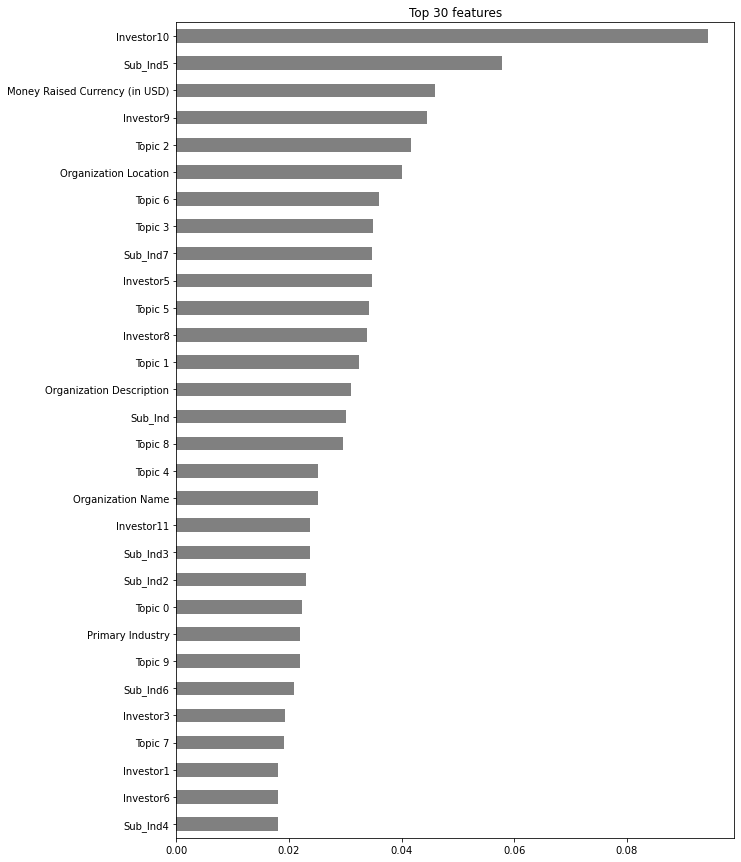

In [116]:
features = pd.Series(importance, X_train2.columns)
n = 30
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
features.sort_values()[-n:].plot.barh(color='grey');


In [145]:
#without column 
pipeline3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier())

params = {
        'xgbclassifier__min_child_weight': [1, 5, 10],
        'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
        'xgbclassifier__subsample': [0.6, 0.8, 1.0],
        'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
        'xgbclassifier__max_depth': [3, 4, 5],
        'xgbclassifier__scale_pos_weight': [10,100,1000,10000,100000],
        "xgbclassifier__reg_alpha": [0, 0.5, 1],
        "xgbclassifier__reg_lambda": [1, 1.5, 2, 3, 4.5],
        "xgbclassifier__n_estimators": [100, 250, 500, 1000]
        }

# If you're on Colab, decrease n_iter & cv parameters
search2 = RandomizedSearchCV(
    pipeline3, 
    param_distributions=params, 
    n_iter=10, 
    cv=5,  
    verbose=10, 
    return_train_score=True,
    scoring=None,  
    n_jobs=-1
)


column = ['Investor10','Sub_Ind5','Investor9','Sub_Ind7','Investor5','Investor8','Organization Description','Organization Name','Investor11','Sub_Ind6','Investor6']
pipe3 = search2.fit(X_train2.drop(columns=column), y_train2)
predictions3 = pipe3.predict(X_test2.drop(columns=column))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.4min finished


In [147]:
print('Best hyperparameters', pipe3.best_params_)
print('Cross-validation score', pipe3.best_score_)

Best hyperparameters {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__reg_alpha': 0.5, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__min_child_weight': 10, 'xgbclassifier__max_depth': 4, 'xgbclassifier__gamma': 1.5, 'xgbclassifier__colsample_bytree': 0.8}
Cross-validation score 0.9190935616592864


In [148]:
#best score!!!!
print(classification_report(y_test2, predictions3))

precision    recall  f1-score   support

           0       0.94      0.96      0.95      2372
           1       0.17      0.12      0.14       153

    accuracy                           0.91      2525
   macro avg       0.56      0.54      0.55      2525
weighted avg       0.90      0.91      0.90      2525



In [150]:
# xgbclassifer + topic modeling 
probs2 = pipe3.predict_proba(X_test2.drop(columns=column))[:, -1]


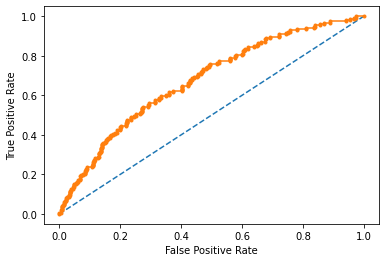

AUC: 0.498


In [151]:
#ROC Curve for xgbclassifer + topic modeling 
fpr, tpr, thresholds = roc_curve(y_test2, probs2)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()
auc_score = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_score)

In [152]:
# xgbclassifer + topic modeling 
precision, recall, thresholds = precision_recall_curve(y_test2, probs2)
auc_score2 = auc(recall, precision)

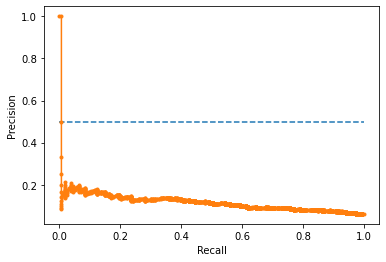

AUC: 0.498


In [153]:
#Precision-Recall Curve for xgbclassifer + topic modeling 
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.show()
print('AUC: %.3f' % auc_score)

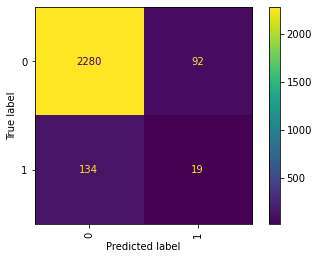

In [155]:
# xgbclassifer + topic modeling 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe3, X_test2.drop(columns=column), y_test2, values_format='.0f', xticks_rotation='vertical')

In [156]:
# i need to write a linear regression model log 1
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

features2 = df2.loc[:, df2.columns != 'Raised Series A']
labels2 = df2['Raised Series A']


X_train3, X_test3, y_train3, y_test3 = train_test_split(features2, labels2, test_size = 0.2, random_state = 42)



In [157]:
#log 1 
pipeline3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    LogisticRegression()
)




pipe4 = pipeline3.fit(X_train3, y_train3);

In [158]:
# log 1 
log_train = pipe4.predict(X_train3)
print("Log reg train Recall Accuracy:", recall_score(y_train3, log_train))
print("Log reg train Accuracy Score:", accuracy_score(y_train3, log_train))
print("Log reg train Precision Accuracy:", precision_score(y_train3, log_train))

Log reg train Recall Accuracy: 0.0
Log reg train Accuracy Score: 0.9432560903149139
Log reg train Precision Accuracy: 0.0


In [173]:
#run test predictions for log 1 
predictions4 = pipe4.predict(X_test3)
print(classification_report(y_test3, predictions4))

precision    recall  f1-score   support

           0       0.94      0.98      0.96      2372
           1       0.12      0.03      0.05       153

    accuracy                           0.93      2525
   macro avg       0.53      0.51      0.51      2525
weighted avg       0.89      0.93      0.91      2525



In [174]:
#log 1 
probs0 = pipe4.predict_proba(X_test3)
probs0 = probs0[:, 1]

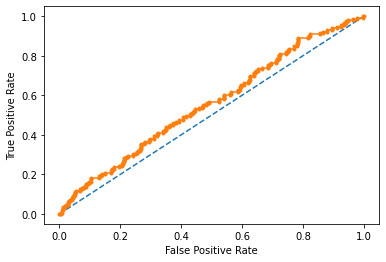

AUC: 0.558


In [175]:
#ROC Curve for log 1 
fpr, tpr, thresholds = roc_curve(y_test3, probs0)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()
auc_score = roc_auc_score(y_test3, probs0)
print('AUC: %.3f' % auc_score)

In [176]:
#log 1 
precision, recall, thresholds = precision_recall_curve(y_test3, probs0)
auc_score2 = auc(recall, precision)

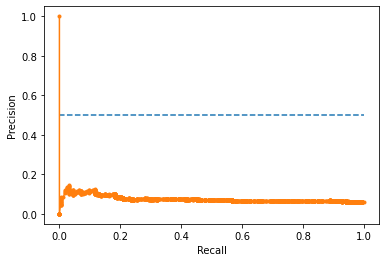

AUC: 0.558


In [177]:
#Precision-Recall Curve Line Plot for Log Model 1 for Imbalanced Classification 
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.show()
print('AUC: %.3f' % auc_score)

In [178]:
# run logistic regression without the topic modeling 
features3 = data.loc[:, data.columns != 'Raised Series A']
labels3 = data['Raised Series A']


X_train4, X_test4, y_train4, y_test4 = train_test_split(features3, labels3, test_size = 0.2, random_state = 42)

In [180]:
#pipeline for log regression without topic modeling 
pipeline5 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    LogisticRegression()
)




pipe5 = pipeline5.fit(X_train4, y_train4);

In [181]:
#scores fore second log func
log_train2 = pipe5.predict(X_train4)
print("Log2 reg train Recall Accuracy:", recall_score(y_train4, log_train2))
print("Log2 reg train Accuracy Score:", accuracy_score(y_train4, log_train2))
print("Log2 reg train Precision Accuracy:", precision_score(y_train4, log_train2))

Log2 reg train Recall Accuracy: 0.0
Log2 reg train Accuracy Score: 0.9432560903149139
Log2 reg train Precision Accuracy: 0.0


In [182]:
#run test predictions 
predictions5 = pipe5.predict(X_test4)
print(classification_report(y_test4, predictions5))

precision    recall  f1-score   support

           0       0.94      0.99      0.96      2372
           1       0.16      0.03      0.05       153

    accuracy                           0.93      2525
   macro avg       0.55      0.51      0.51      2525
weighted avg       0.89      0.93      0.91      2525



In [184]:
probs5 = pipe5.predict_proba(X_test4)
probs5 = probs5[:, 1]

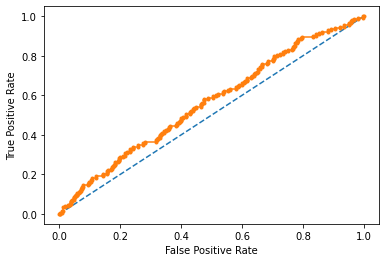

AUC: 0.564


In [186]:
#ROC Curve 
fpr, tpr, thresholds = roc_curve(y_test4, probs5)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()
auc_score = roc_auc_score(y_test4, probs5)
print('AUC: %.3f' % auc_score)

In [190]:
#log regression without topic modeling
precision, recall, thresholds = precision_recall_curve(y_test4, probs5)
auc_score2 = auc(recall, precision)

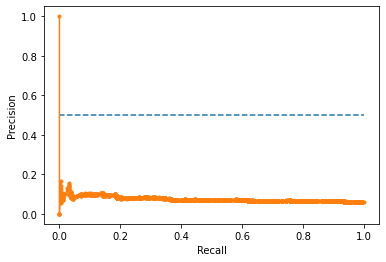

AUC: 0.564


In [191]:
#Precision-Recall Curve Line Plot for Log Model 1 for Imbalanced Classification 
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.show()
print('AUC: %.3f' % auc_score)